<a href="https://colab.research.google.com/github/GinantiRiski1/Eksperimen-SIBI/blob/main/Pemilihan_dan_Pembagian_Dataset_Alfabet_SIBI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pemilihan dan Pembagian Dataset Alfabet SIBI**

### **Mengunduh dataset dari Kaggle**

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle

from google.colab import files
uploaded = files.upload()

!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d anissatrilahitani/abjad-sibi

Dataset URL: https://www.kaggle.com/datasets/anissatrilahitani/abjad-sibi
License(s): MIT
 99% 4.58G/4.63G [01:00<00:01, 24.6MB/s]
100% 4.63G/4.63G [01:00<00:00, 82.2MB/s]


In [ ]:
!unzip abjad-sibi.zip

Streaming output truncated to the last 5000 lines.
  inflating: Train/Z/1897.jpg        
  inflating: Train/Z/1898.jpg        
  inflating: Train/Z/1899.jpg        
  inflating: Train/Z/19.jpg          
  inflating: Train/Z/190.jpg         
  inflating: Train/Z/1900.jpg        
  inflating: Train/Z/1901.jpg        
  inflating: Train/Z/1902.jpg        
  inflating: Train/Z/1903.jpg        
  inflating: Train/Z/1904.jpg        
  inflating: Train/Z/1905.jpg        
  inflating: Train/Z/1906.jpg        
  inflating: Train/Z/1907.jpg        
  inflating: Train/Z/1908.jpg        
  inflating: Train/Z/1909.jpg        
  inflating: Train/Z/191.jpg         
  inflating: Train/Z/1910.jpg        
  inflating: Train/Z/1911.jpg        
  inflating: Train/Z/1912.jpg        
  inflating: Train/Z/1913.jpg        
  inflating: Train/Z/1914.jpg        
  inflating: Train/Z/1915.jpg        
  inflating: Train/Z/1916.jpg        
  inflating: Train/Z/1917.jpg        
  inflating: Train/Z/1918.jpg        

### **Memilih dan membagi dataset kedalam folder train, val, test, dan reserve**

`split_dirs` = List berisi folder yang akan dibuat.

`alphabets` = List berisi alfabet yang diambil dari nama subfolder pada dataset asal. Digunakan untuk membuat subfolder baru didalam folder `split_dirs`.

In [ ]:
import os
import shutil
import random

# Path ke direktori
base_dir = '/content/Train'

split_dirs = ['train', 'val', 'test', 'reserve']
alphabets = ([name for name in sorted(os.listdir(base_dir)) if len(name) == 1])

print("Alphabets :", alphabets)

Alphabets : ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


**Membuat direktori baru untuk menyimpan hasil pembagian data**

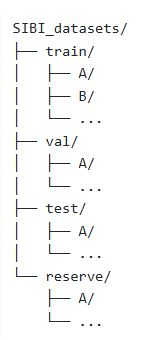

In [ ]:
# Membuat direktori baru untuk menyimpan hasil pemilihan gambar
output_dir = 'SIBI_datasets'
os.makedirs(output_dir, exist_ok=True)
print("Membuat folder SIBI_datasets\n")

for split in split_dirs:
  for alphabet in alphabets:
    os.makedirs(f"{output_dir}/{split}/{alphabet}", exist_ok=True)
  print(f"Abjad dalam subfolder {split}:", len(os.listdir(f"{output_dir}/{split}")))

Membuat folder SIBI_datasets

Abjad dalam subfolder train: 26
Abjad dalam subfolder val: 26
Abjad dalam subfolder test: 26
Abjad dalam subfolder reserve: 26


**Untuk setiap folder alfabet, memilih 1100 gambar dan membaginya ke dalam folder train, val, test, and reserve.**

Rasio pembagian dataset:
* train = 800 gambar untuk setiap alfabet
* val = 100 gambar untuk setiap alfabet
* test = 100 gambar untuk setiap alfabet
* reserve = 100 gambar untuk setiap alfabet

In [ ]:
# Fungsi untuk mengecek jumlah data di dalam direktori
def check_data(alphabet, size, split_folder):
  if size == len(os.listdir(os.path.join(output_dir, split_folder, alphabet))):
    print(f"Jumlah data di {split_folder} dataset sesuai. Ada {size} gambar")
    return True
  else:
    print(f"Jumlah data di {split_folder} dataset tidak sesuai. Seharusnya {size} gambar, tapi ada {len(os.listdir(os.path.join(output_dir, split_folder, alphabet)))} gambar")
    return False

# Fungsi untuk membagi data ke direktori train, val, test, dan reserve
def select_and_split_data():
    for alphabet in alphabets:
        print(f"---------------------------------------------")
        print(f"Abjad {alphabet}")

        alphabet_path = os.path.join(base_dir, alphabet)
        images = [img for img in os.listdir(alphabet_path) if img.endswith('.jpg')]

        # Hanya memilih 1000 gambar jika ada lebih
        if len(images) >= 1000:
            random.seed(42)
            selected_images = random.sample(images, 1100)
            print(f"Jumlah data cukup. Dari {len(images)} gambar, ambil {len(selected_images)} gambar\n")
        else:
            # Ambil semua jika gambar kurang dari 1000
            selected_images = images
            print(f"Jumlah data tidak cukup. Terdapat {len(selected_images)} gambar\n")

        # Membagi ukuran data : 100 gambar untuk reserve, 1000 gambar sisanya dibagi dengan rasio 80% train, 10% validation, and 10% test
        reserve_size = 100
        new_size = len(selected_images) - reserve_size
        train_size = int(0.8 * new_size)
        val_size = int(0.1 * new_size)
        test_size = int(0.1 * new_size)

        # Membagi data ke dalam folder train, val, test, and reserve
        train_images = selected_images[:train_size]
        val_images = selected_images[train_size:train_size + val_size]
        test_images = selected_images[train_size + val_size:train_size + val_size + test_size]
        reserve_images = selected_images[train_size + val_size + test_size:]

        # Menyalin gambar terpilih ke direktori yang sesuai
        for image in train_images:
            shutil.copy(os.path.join(alphabet_path, image), os.path.join(output_dir, 'train', alphabet, image))
        for image in val_images:
            shutil.copy(os.path.join(alphabet_path, image), os.path.join(output_dir, 'val', alphabet, image))
        for image in test_images:
            shutil.copy(os.path.join(alphabet_path, image), os.path.join(output_dir, 'test', alphabet, image))
        for image in reserve_images:
            shutil.copy(os.path.join(alphabet_path, image), os.path.join(output_dir, 'reserve', alphabet, image))

        # Mengecek jumlah data dalam direktori
        train_check = check_data(alphabet, train_size, 'train')
        val_check = check_data(alphabet, val_size, 'val')
        test_check = check_data(alphabet, test_size, 'test')
        reserve_check = check_data(alphabet, reserve_size, 'reserve')

        # Mendapatkan status information
        if train_check and val_check and test_check and reserve_check:
          ket = print(f"\nImage Selection and Data Splitting for alphabet {alphabet} Success!")
        else:
          ket = print(f"\nImage Selection and Data Splitting for alphabet {alphabet} Failed!")
          break
    # Menampilkan status information
    return ket

select_and_split_data()

---------------------------------------------
Abjad A
Jumlah data cukup. Dari 5996 gambar, ambil 1100 gambar

Jumlah data di train dataset sesuai. Ada 800 gambar
Jumlah data di val dataset sesuai. Ada 100 gambar
Jumlah data di test dataset sesuai. Ada 100 gambar
Jumlah data di reserve dataset sesuai. Ada 100 gambar

Image Selection and Data Splitting for alphabet A Success!
---------------------------------------------
Abjad B
Jumlah data cukup. Dari 5996 gambar, ambil 1100 gambar

Jumlah data di train dataset sesuai. Ada 800 gambar
Jumlah data di val dataset sesuai. Ada 100 gambar
Jumlah data di test dataset sesuai. Ada 100 gambar
Jumlah data di reserve dataset sesuai. Ada 100 gambar

Image Selection and Data Splitting for alphabet B Success!
---------------------------------------------
Abjad C
Jumlah data cukup. Dari 5996 gambar, ambil 1100 gambar

Jumlah data di train dataset sesuai. Ada 800 gambar
Jumlah data di val dataset sesuai. Ada 100 gambar
Jumlah data di test dataset sesuai

**Menampilkan distribusi jumlah gambar pada setiap folder**

In [ ]:
# Menghitung jumlah gambar pada setiap subfolder alfabet dan menyimpan data dalam dataframe
import os
import pandas as pd

data_dir = '/content/SIBI_datasets'

data = []
split_folders = ([name for name in os.listdir(data_dir)])

for split in split_folders:
    alphabets = sorted(os.listdir(os.path.join(data_dir, split)))
    for alphabet in alphabets:
        img_files = os.listdir(os.path.join(data_dir,split,alphabet))
        num_imgs = len(img_files)
        data.append({'Folder': split, 'Alfabet': alphabet, 'Jumlah': num_imgs})

df = pd.DataFrame(data)

In [ ]:
# Mengelompokkan data untuk melihat jumlah gambar pada setiap folder
groupby_df = df.groupby('Folder').agg({'Jumlah': 'sum'}).reset_index()

print(groupby_df)
print(f"\nTotal gambar: {groupby_df['Jumlah'].sum()}")

    Folder  Jumlah
0  reserve    2600
1     test    2600
2    train   20800
3      val    2600

Total gambar: 28600


In [ ]:
# Menampilkan distribusi gambar pada setiap folder berdasarkan alfabet
image_counts = df.pivot(index='Alfabet', columns='Folder', values='Jumlah').reset_index()

image_counts.columns.name = None
print(image_counts)

   Alfabet  reserve  test  train  val
0        A      100   100    800  100
1        B      100   100    800  100
2        C      100   100    800  100
3        D      100   100    800  100
4        E      100   100    800  100
5        F      100   100    800  100
6        G      100   100    800  100
7        H      100   100    800  100
8        I      100   100    800  100
9        J      100   100    800  100
10       K      100   100    800  100
11       L      100   100    800  100
12       M      100   100    800  100
13       N      100   100    800  100
14       O      100   100    800  100
15       P      100   100    800  100
16       Q      100   100    800  100
17       R      100   100    800  100
18       S      100   100    800  100
19       T      100   100    800  100
20       U      100   100    800  100
21       V      100   100    800  100
22       W      100   100    800  100
23       X      100   100    800  100
24       Y      100   100    800  100
25       Z  

### **Mengunduh hasil pembagian dataset**

**Melakukan kompresi folder dengan zip**

In [ ]:
# Zip folder SIBI_datasets/ tanpa subfolder reserve. Hanya berisi subfolder train, val, test
%cd /content/
!zip -r SIBI_datasets.zip SIBI_datasets/ -x "SIBI_datasets/reserve/*"

Streaming output truncated to the last 5000 lines.
  adding: SIBI_datasets/train/F/727.jpg (deflated 1%)
  adding: SIBI_datasets/train/F/2086.jpg (deflated 1%)
  adding: SIBI_datasets/train/F/F2212.jpg (deflated 1%)
  adding: SIBI_datasets/train/F/F233.jpg (deflated 1%)
  adding: SIBI_datasets/train/F/F2120.jpg (deflated 1%)
  adding: SIBI_datasets/train/F/F2975.jpg (deflated 1%)
  adding: SIBI_datasets/train/F/F1723.jpg (deflated 1%)
  adding: SIBI_datasets/train/F/F646.jpg (deflated 1%)
  adding: SIBI_datasets/train/F/411.jpg (deflated 1%)
  adding: SIBI_datasets/train/F/F1279.jpg (deflated 1%)
  adding: SIBI_datasets/train/F/F1763.jpg (deflated 1%)
  adding: SIBI_datasets/train/F/369.jpg (deflated 1%)
  adding: SIBI_datasets/train/F/F371.jpg (deflated 1%)
  adding: SIBI_datasets/train/F/615.jpg (deflated 1%)
  adding: SIBI_datasets/train/F/1974.jpg (deflated 1%)
  adding: SIBI_datasets/train/F/2851.jpg (deflated 1%)
  adding: SIBI_datasets/train/F/1445.jpg (deflated 1%)
  adding: SI

In [ ]:
# Zip subfolder reserve dari /content/SIBI_datasets/
%cd /content/SIBI_datasets/
!zip -r SIBI_reserve_dataset.zip reserve/

/content/SIBI_datasets
  adding: reserve/ (stored 0%)
  adding: reserve/U/ (stored 0%)
  adding: reserve/U/U2226.jpg (deflated 1%)
  adding: reserve/U/U718.jpg (deflated 1%)
  adding: reserve/U/U1146.jpg (deflated 1%)
  adding: reserve/U/U565.jpg (deflated 0%)
  adding: reserve/U/U805.jpg (deflated 1%)
  adding: reserve/U/867.jpg (deflated 1%)
  adding: reserve/U/2866.jpg (deflated 1%)
  adding: reserve/U/991.jpg (deflated 1%)
  adding: reserve/U/U1325.jpg (deflated 1%)
  adding: reserve/U/U145.jpg (deflated 1%)
  adding: reserve/U/U156.jpg (deflated 1%)
  adding: reserve/U/558.jpg (deflated 1%)
  adding: reserve/U/U2950.jpg (deflated 1%)
  adding: reserve/U/976.jpg (deflated 1%)
  adding: reserve/U/U137.jpg (deflated 1%)
  adding: reserve/U/2681.jpg (deflated 1%)
  adding: reserve/U/U548.jpg (deflated 1%)
  adding: reserve/U/U232.jpg (deflated 1%)
  adding: reserve/U/U2040.jpg (deflated 1%)
  adding: reserve/U/U1249.jpg (deflated 1%)
  adding: reserve/U/U2265.jpg (deflated 1%)
  addin

**Mengunduh file zip ke lokal**

In [ ]:
from google.colab import files
files.download('/content/SIBI_datasets.zip')

In [ ]:
files.download('/content/SIBI_datasets/SIBI_reserve_dataset.zip')

link dataset zip:

*   SIBI datasets : https://drive.google.com/file/d/1S3qe0CUb0Ti5ijmquScydP8s67Gu31Zv/view?usp=sharing

*   SIBI reserve dataset : https://drive.google.com/file/d/13i9xTFhg6PPQ1rnxtsW5XIBs7SNQ-sCK/view?usp=sharing

